# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
## import the packages
import pickle
import csv

import numpy as np
import random

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.contrib.layers import flatten

import time

%matplotlib inline

In [2]:
## Load pickled data
training_file = "traffic-signs-data/train.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_original, y_train_original = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

# the coorinates are also loaded for tuture experiments
coords_train = train['coords']
coords_test = test['coords']

In [3]:
## let's also load the traffic sign id-name mapping file, getting a better clue of each image
id_name_mapping = {}
with open("signnames.csv", "r") as csv_file:
    reader = csv.reader(csv_file, delimiter=',')
    next(reader, None)   # omit the header
    for row in reader:
        id_name_mapping[int(row[0])] = row[1]

---

### Rubric 2.1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

**Data Integrity Check**

In [4]:
## a "shallow" verification of data integrity
assert(len(X_train_original) == len(y_train_original))
assert(len(X_test) == len(y_test))

In [5]:
## Replace each question mark with the appropriate value.
n_train = len(X_train_original)
n_test = len(X_test)
image_shape = X_train_original[0].shape
n_classes = len(np.unique(y_train_original))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [6]:
## let's see the types of the traffic sign data set
id_name_mapping

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

(2, 'Speed limit (50km/h)')


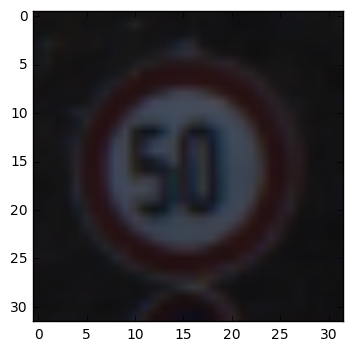

In [7]:
# randomly show an image
def show_rand_image_with_given_class(images, labels, label_id, is_gray=False):
    image_per_class = images[np.where(labels == label_id)]
    index = random.randint(0, len(image_per_class))
#     plt.figure(figsize=(1,1))
    if is_gray:
        squeezed_gray = np.squeeze(image_per_class)
        plt.imshow(squeezed_gray[index], cmap="gray")
    else:
        image = image_per_class[index]
        plt.imshow(image)
    print((label_id, id_name_mapping[label_id]))

show_rand_image_with_given_class(X_train_original, y_train_original, 2)

### Rubric 2.2 Sample category distribution

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [8]:
# the number of training and test samples per classes
class_numbers_train = np.array([len(y_train_original[y_train_original == i]) for i in range(n_classes)])
class_numbers_test = np.array([len(y_test[y_test == i]) for i in range(n_classes)])

<Container object of 43 artists>

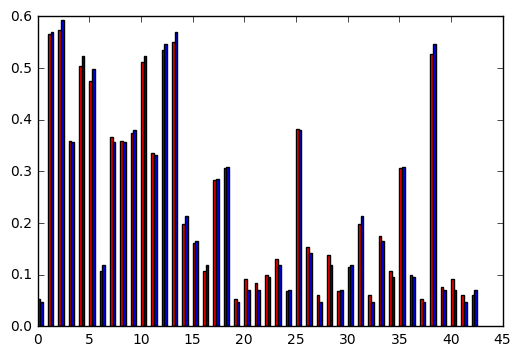

In [9]:
plt.bar(np.arange(n_classes), class_numbers_train/float(len(y_train_original))*10, color='r', width=0.25)
plt.bar(np.arange(n_classes)+0.25, class_numbers_test/float(len(y_test))*10, color='b', width=0.25)

----
## Design and Test a Model Architecture

### Rubric 3.1, data preprocessing - grayscale

(13, 'Yield')


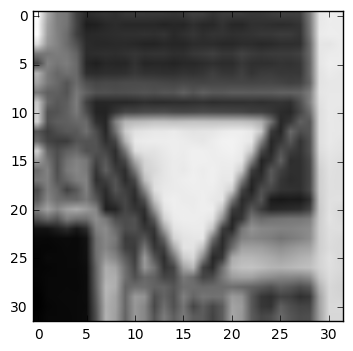

In [82]:
show_rand_image_with_given_class(X_train_gray, y_train, 13, is_gray=True)

### Rubric 3.2, data splitting

In [40]:
def split_data(x, y, size=0.1):
    print("Training before split: %s" % len(x))

    # Get randomized datasets for training and validation
    X_train, X_validation, y_train, y_validation = train_test_split(x, y, test_size=size, random_state=832289)

    assert(len(X_train) == len(y_train))
    assert(len(X_validation) == len(y_validation))

    print("Training after split: %s " % len(X_train))
    print("Validation after split: %s " % len(X_validation))
    return X_train, X_validation, y_train, y_validation

In [41]:
X_train, X_validation, y_train, y_validation = split_data(X_train_original, y_train_original, size=0.2)

Training before split: 39209
Training after split: 31367 
Validation after split: 7842 


In [42]:
# validate the splitted data
assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
X_train.shape, X_validation.shape

((31367, 32, 32, 3), (7842, 32, 32, 3))

### Rubric 3.3, model definition

In [30]:
# let's redefine the architecture
## def the network
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    return tf.matmul(fc2, fc3_W) + fc3_b


### Rubric 3.4 Training the model

In [ ]:
rate = 0.001
EPOCHS = 50
BATCH_SIZE = 128

In [32]:
# define the tensors
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

In [37]:
t = time.time()

validation_accuracy = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_gray)

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_shuffled, y_train_shuffled = shuffle(X_train_gray, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_shuffled[offset:end], y_train_shuffled[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

        validation_accuracy.append(evaluate(X_validation_gray, y_validation))
        if (i % 5 == 0 and i != 0): 
            print("EPOCH {} ...".format(i))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy[i]))
            print()

    saver.save(sess, './checkpoints/lenet-gray-epoch50')
    print("Model saved")

print()
print("Time Eclipsed: " + str(time.time() - t))

Training...

EPOCH 5 ...
Validation Accuracy = 0.939

EPOCH 10 ...
Validation Accuracy = 0.960

EPOCH 15 ...
Validation Accuracy = 0.970

EPOCH 20 ...
Validation Accuracy = 0.959

EPOCH 25 ...
Validation Accuracy = 0.971

EPOCH 30 ...
Validation Accuracy = 0.978

EPOCH 35 ...
Validation Accuracy = 0.978

EPOCH 40 ...
Validation Accuracy = 0.975

EPOCH 45 ...
Validation Accuracy = 0.977

Model saved

Time Eclipsed: 889.9598610401154


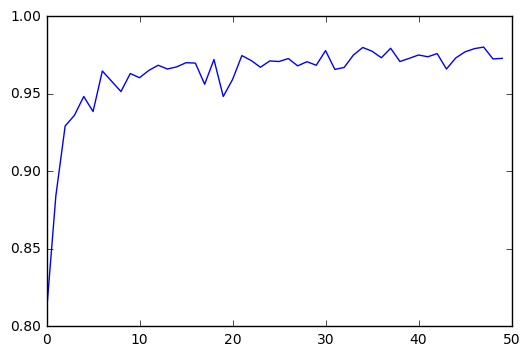

In [44]:
plt.plot(range(50), validation_accuracy)

In [45]:
# run the medel on test set
## run on the test set
t = time.time()
with tf.Session() as sess:
    saver.restore(sess, './checkpoints/lenet-gray-epoch50')
    test_accuracy = evaluate(X_test_gray, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print("Time Eclipsed: " + str(time.time() - t))

Test Accuracy = 0.907
Time Eclipsed: 3.543776035308838


---

## Step 3: Test a Model on New Images

### Rubric 4.1 Loading the test images

In [86]:
# loading the test images;
import os
import cv2

test_images = []
test_labels = []
for f in os.listdir("./test-images/"):
    if ".jpg" in f:
        img = cv2.imread("./test-images/" + f)
        assert(img.shape == (32,32,3))
        test_images.append(img)
        test_labels.append(f[:f.index("-")])
test_images = np.array(test_images)
test_images.shape

(5, 32, 32, 3)

In [87]:
with tf.Session() as sess:
    test_image_gray = sess.run(tf.image.rgb_to_grayscale(test_images))

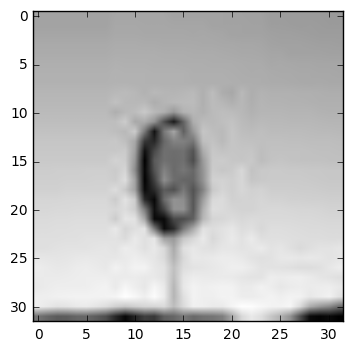

In [89]:
plt.imshow(np.squeeze(test_image_gray)[3], cmap="gray")

In [90]:
test_labels

['0', '1', '14', '2', '2']

### Rubric 4.2, Making predictions

In [91]:
t = time.time()
with tf.Session() as sess:
    saver.restore(sess, './checkpoints/lenet-gray-epoch50')
    test_accuracy = evaluate(test_image_gray, test_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print("Time Eclipsed: " + str(time.time() - t))

Test Accuracy = 0.200
Time Eclipsed: 1.0618770122528076


In [92]:
test_image_gray.shape

(5, 32, 32, 1)

In [105]:
with tf.Session() as sess:
    saver.restore(sess, './checkpoints/lenet-gray-epoch50')
    topk = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), feed_dict={x: test_image_gray})

In [126]:
for tk in range(len(topk.indices)):
    print("| Probability  |     Prediction                                                      |")
    print("|:------------:|:-------------------------------------------------------------------:|")
    for k in range(len(topk.indices[tk])):
        print("| %.3f        |%-45s                        |" % (topk.values[tk][k], id_name_mapping[topk.indices[tk][k]]))
    print("\n")    

| Probability  |     Prediction                                                      |
|:------------:|:-------------------------------------------------------------------:|
| 0.991        |Yield                                                                |
| 0.009        |Speed limit (50km/h)                                                 |
| 0.000        |Keep right                                                           |
| 0.000        |Slippery road                                                        |
| 0.000        |Turn left ahead                                                      |


| Probability  |     Prediction                                                      |
|:------------:|:-------------------------------------------------------------------:|
| 1.000        |Speed limit (30km/h)                                                 |
| 0.000        |Stop                                                                 |
| 0.000        |Roundabout mandatory     

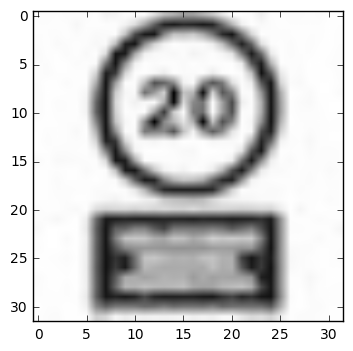

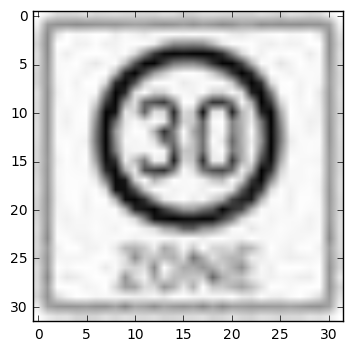

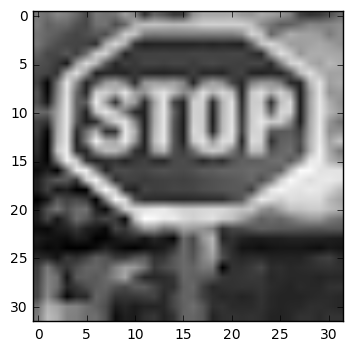

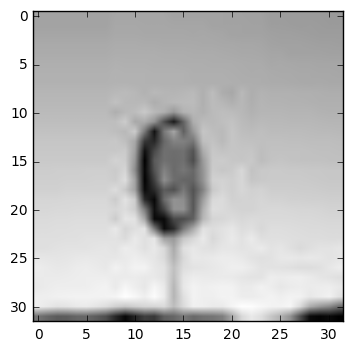

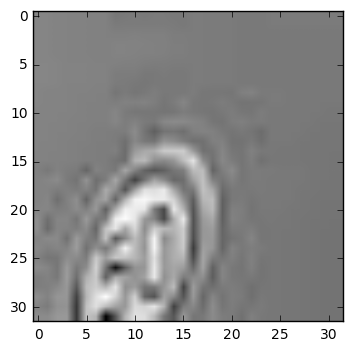

In [127]:
for i in range(len(test_image_gray)):
    plt.figure()
    plt.imshow(np.squeeze(test_image_gray[i]), cmap="gray")